# Fruit and Vegetable Classification
## \# Class activation heatmap for image classification
## \# Grad-CAM class activation visualization

Having 3861 images of 36 different fruits/vegetables

![fruit vegetable](https://i.imgur.com/KUAcIQD.jpeg)

<h1>Table of contents</h1>


<ul>
<li><a href="#1"><strong>1. Loading and preprocessing</strong></a>
</ul>
    
<ul>
<li><a href="#2"><strong>2. Load the Images with a generator and Data Augmentation</strong></a>
</ul>

<ul>
<li><a href="#3"><strong>3. Train the model</strong></a>
</ul>

<ul>
<li><a href="#4"><strong>4. Visualize the result</strong></a>
</ul>

<ul>
<li><a href="#5"><strong>5. Class activation heatmap for image classification</strong></a>
</ul>

# Context

This dataset contains images of the following food items:

- **fruits**: banana, apple, pear, grapes, orange, kiwi, watermelon, pomegranate, pineapple, mango
- **vegetables**: cucumber, carrot, capsicum, onion, potato, lemon, tomato, raddish, beetroot, cabbage, lettuce, spinach, soy bean, cauliflower, bell pepper, chilli pepper, turnip, corn, sweetcorn, sweet potato, paprika, jalepeño, ginger, garlic, peas, eggplant

# Content
This dataset contains three folders:

- train (100 images each)
- test (10 images each)
- validation (10 images each)
each of the above folders contains subfolders for different fruits and vegetables wherein the images for respective food items are present# Context

This dataset contains images of the following food items:

- **fruits**: banana, apple, pear, grapes, orange, kiwi, watermelon, pomegranate, pineapple, mango
- **vegetables**: cucumber, carrot, capsicum, onion, potato, lemon, tomato, raddish, beetroot, cabbage, lettuce, spinach, soy bean, cauliflower, bell pepper, chilli pepper, turnip, corn, sweetcorn, sweet potato, paprika, jalepeño, ginger, garlic, peas, eggplant

# Content
This dataset contains three folders:

- train (100 images each)
- test (10 images each)
- validation (10 images each)
each of the above folders contains subfolders for different fruits and vegetables wherein the images for respective food items are present


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Loading and preprocessing<a class="anchor" id="1"></a><a class="anchor" id="1"></a>

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

# Create a list with the filepaths for training and testing
train_dir = Path('/content/drive/MyDrive/Colab Notebooks/fruit-vegeatables/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('/content/drive/MyDrive/Colab Notebooks/fruit-vegeatables/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('/content/drive/MyDrive/Colab Notebooks/fruit-vegeatables/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

In [3]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['soy beans' 'spinach' 'paprika' 'cucumber' 'carrot' 'jalepeno' 'orange'
 'pineapple' 'eggplant' 'turnip' 'capsicum' 'sweetpotato' 'chilli pepper'
 'tomato' 'cauliflower' 'lemon' 'corn' 'sweetcorn' 'beetroot' 'banana'
 'raddish' 'cabbage' 'watermelon' 'potato' 'onion' 'ginger' 'lettuce'
 'mango' 'peas' 'garlic' 'bell pepper' 'kiwi' 'pear' 'pomegranate' 'apple'
 'grapes']


In [4]:
# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(5)

Filepath      Label
0  /content/drive/MyDrive/Colab Notebooks/fruit-v...  soy beans
1  /content/drive/MyDrive/Colab Notebooks/fruit-v...    spinach
2  /content/drive/MyDrive/Colab Notebooks/fruit-v...    paprika
3  /content/drive/MyDrive/Colab Notebooks/fruit-v...   cucumber
4  /content/drive/MyDrive/Colab Notebooks/fruit-v...     carrot

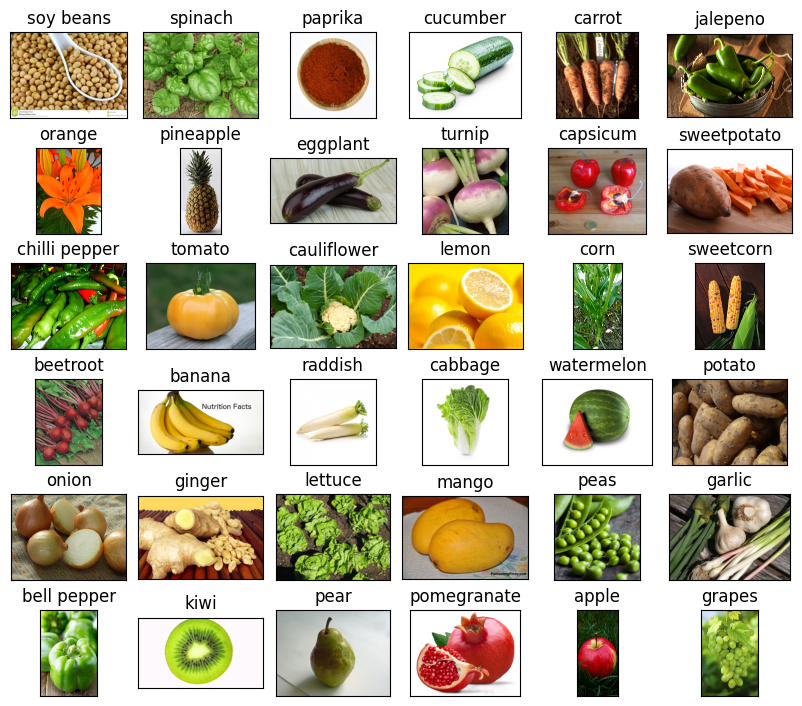

In [5]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

# 2. Load the Images with a generator and Data Augmentation<a class="anchor" id="2"></a>

In [6]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2780 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.


In [7]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 3. Train the model<a class="anchor" id="3"></a>

In [8]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 1030s 12s/step - accuracy: 0.3488 - loss: 2.5489 - val_accuracy: 0.8263 - val_loss: 0.5166
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.8002 - loss: 0.6047 - val_accuracy: 0.8922 - val_loss: 0.3339
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.8913 - loss: 0.3552 - val_accuracy: 0.9251 - val_loss: 0.2293
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.9363 - loss: 0.2108 - val_accuracy: 0.9222 - val_loss: 0.2269
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9575 - loss: 0.1527 - val_accuracy: 0.9461 - val_loss: 0.1773


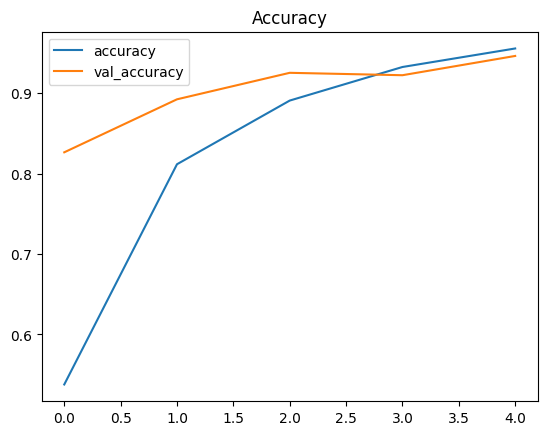

In [9]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

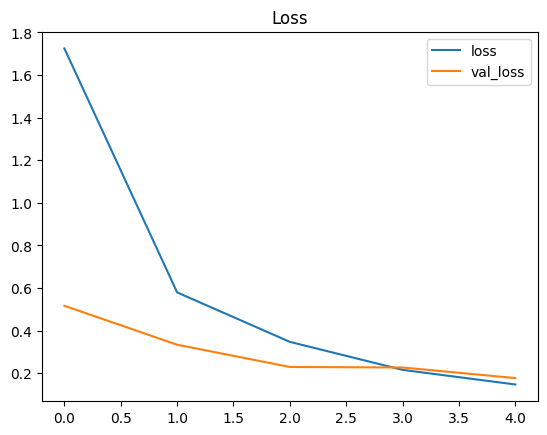

In [10]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

# 4. Visualize the result<a class="anchor" id="4"></a>

In [11]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


In [12]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 94.61%


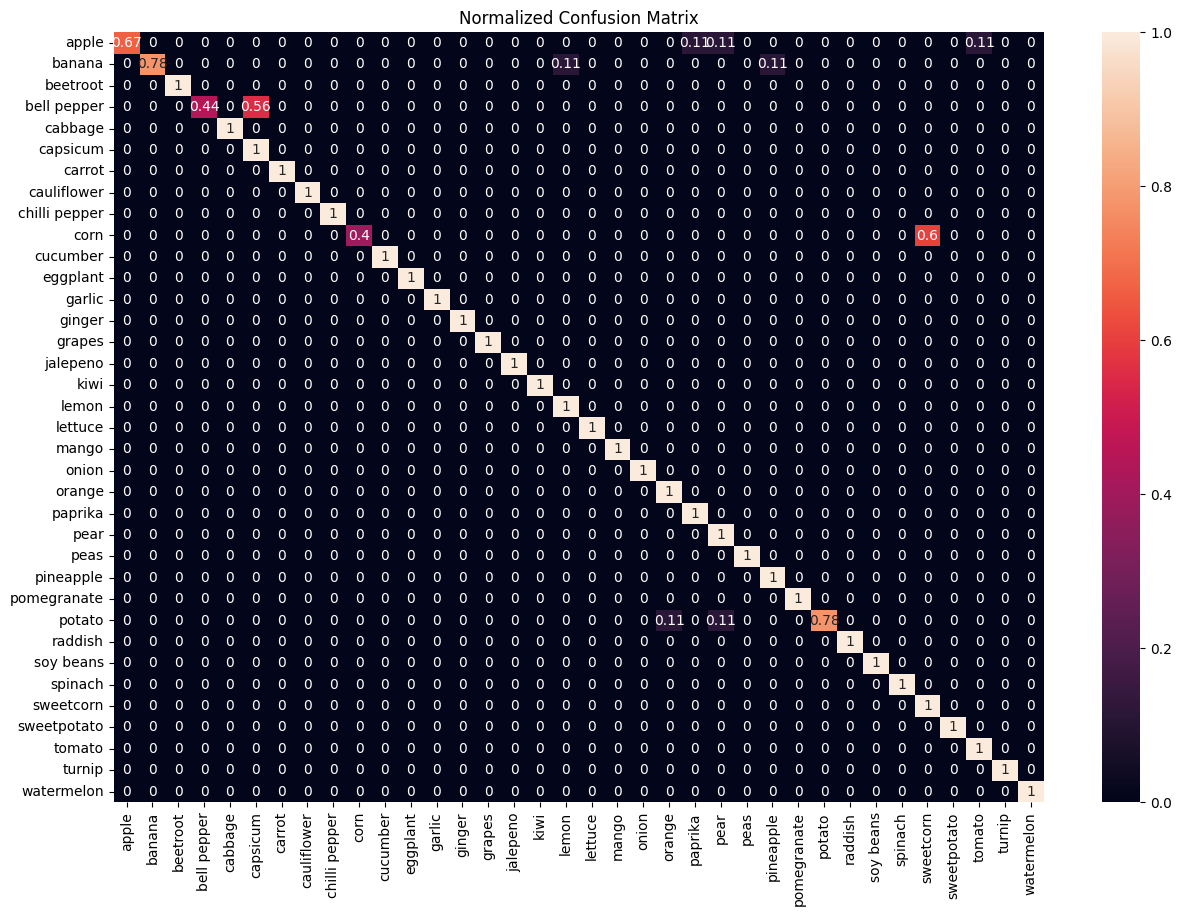

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix,
            annot=True,
            xticklabels = sorted(set(y_test)),
            yticklabels = sorted(set(y_test)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()

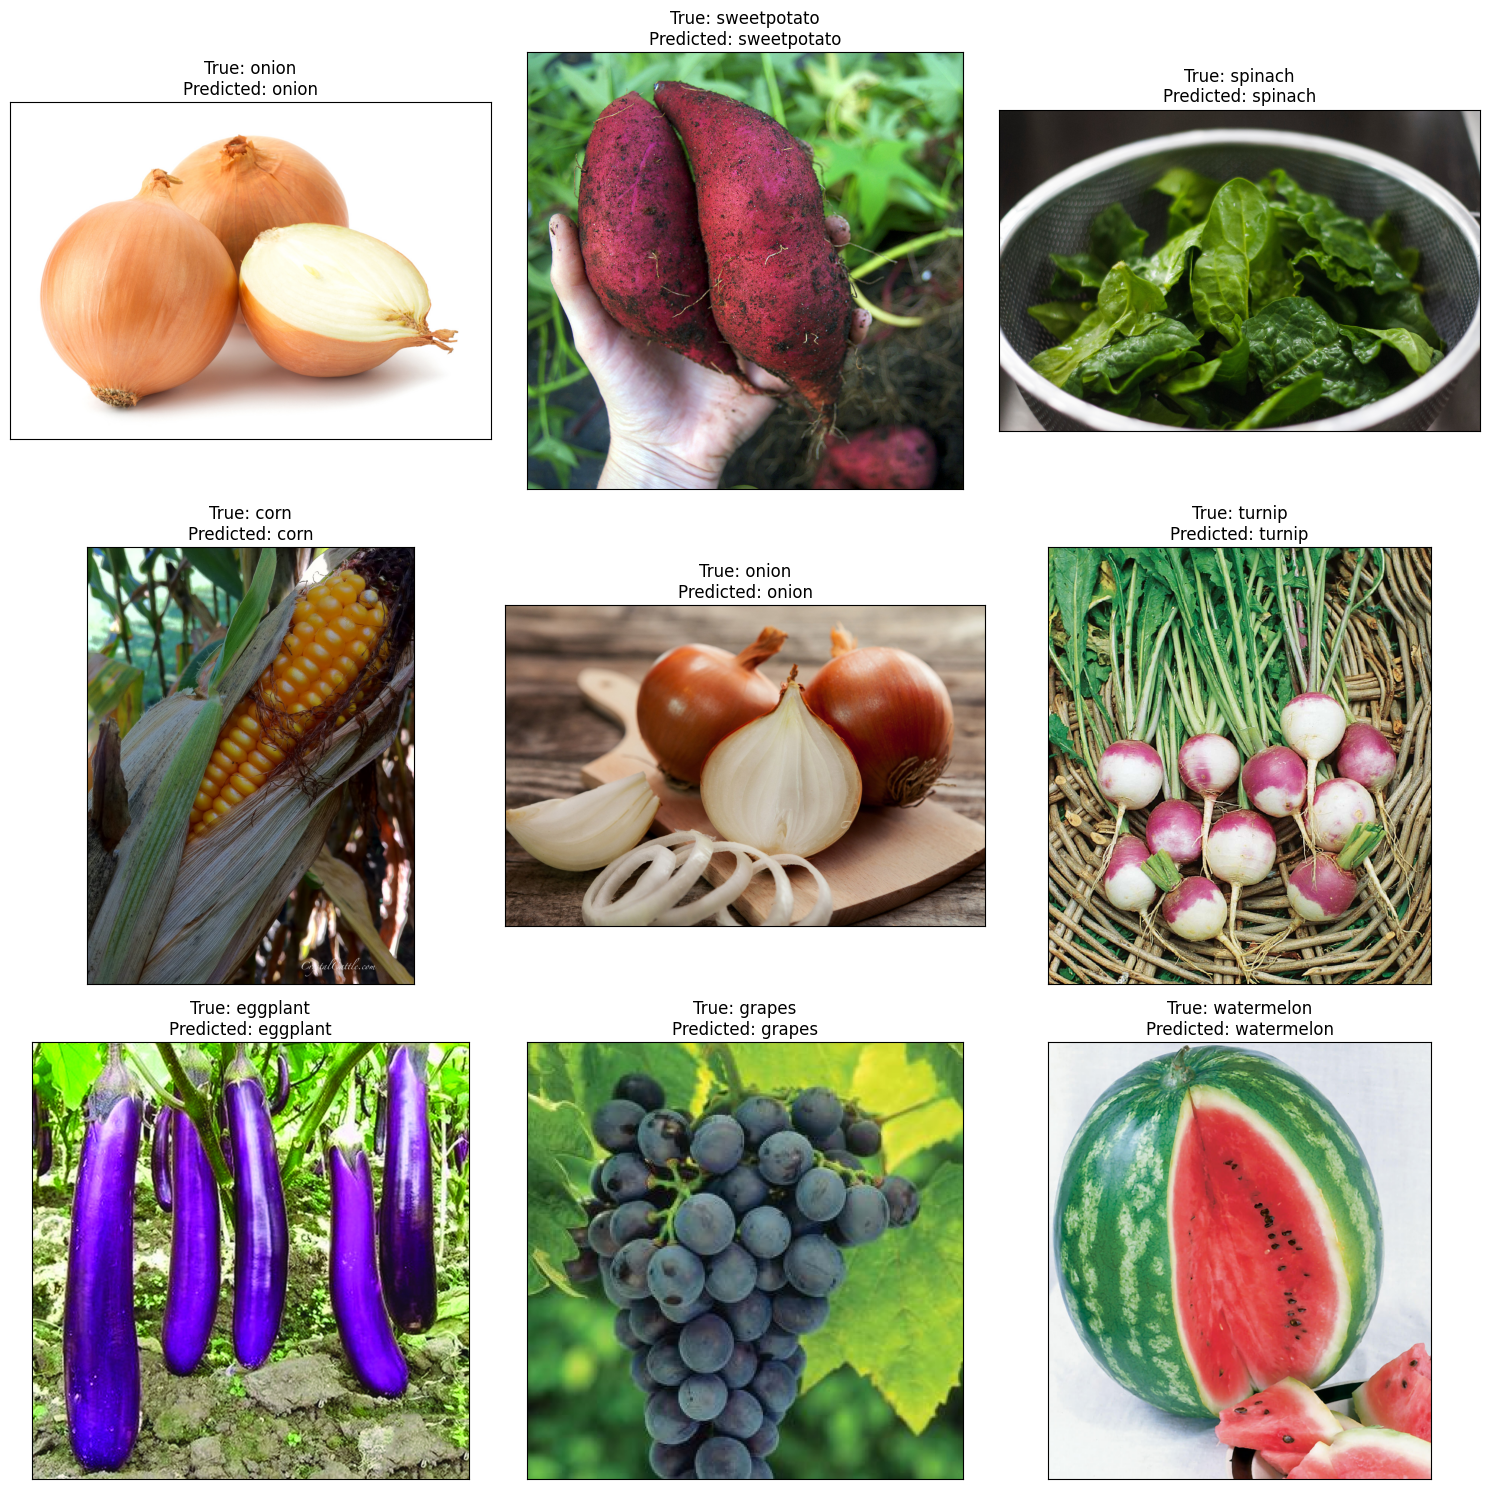

In [14]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

## 5. Class activation heatmap for image classification<a class="anchor" id="5"></a>
### Grad-CAM class activation visualization
*Code adapted from keras.io*

In [15]:
import matplotlib.cm as cm

def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))

    return cam_path

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "Conv_1"
img_size = (224,224)

# Remove last layer's softmax
model.layers[-1].activation = None

In [16]:
# Grad-CAM on a few images
sample_images = test_df.Filepath.head(3).tolist()

for i, img_path in enumerate(sample_images):
    # Prepare image
    img_array = get_img_array(img_path, size=img_size)
    img_array = preprocess_input(img_array)

    # Generate heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Save and display
    cam_path = save_and_display_gradcam(img_path, heatmap, f"cam_{i}.jpg")
    print(f"Grad-CAM saved for {os.path.basename(img_path)}")

Grad-CAM saved for Image_10.jpg
Grad-CAM saved for Image_2.jpg
Grad-CAM saved for Image_9.jpg


In [19]:
# Get detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

# Check per-class accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
class_accuracy = cm.diagonal() / cm.sum(axis=1)
for i, acc in enumerate(class_accuracy):
    print(f"{labels[i]}: {acc:.2%}")

               precision    recall  f1-score   support

        apple       1.00      0.67      0.80         9
       banana       1.00      0.78      0.88         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       1.00      0.44      0.62         9
      cabbage       1.00      1.00      1.00        10
     capsicum       0.64      1.00      0.78         9
       carrot       1.00      1.00      1.00         7
  cauliflower       1.00      1.00      1.00         9
chilli pepper       1.00      1.00      1.00         7
         corn       1.00      0.40      0.57        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00         8
     jalepeno       1.00      1.00      1.00         9
         kiwi       1.00      1.00      1.00        10
        l

Number of misclassified images: 18


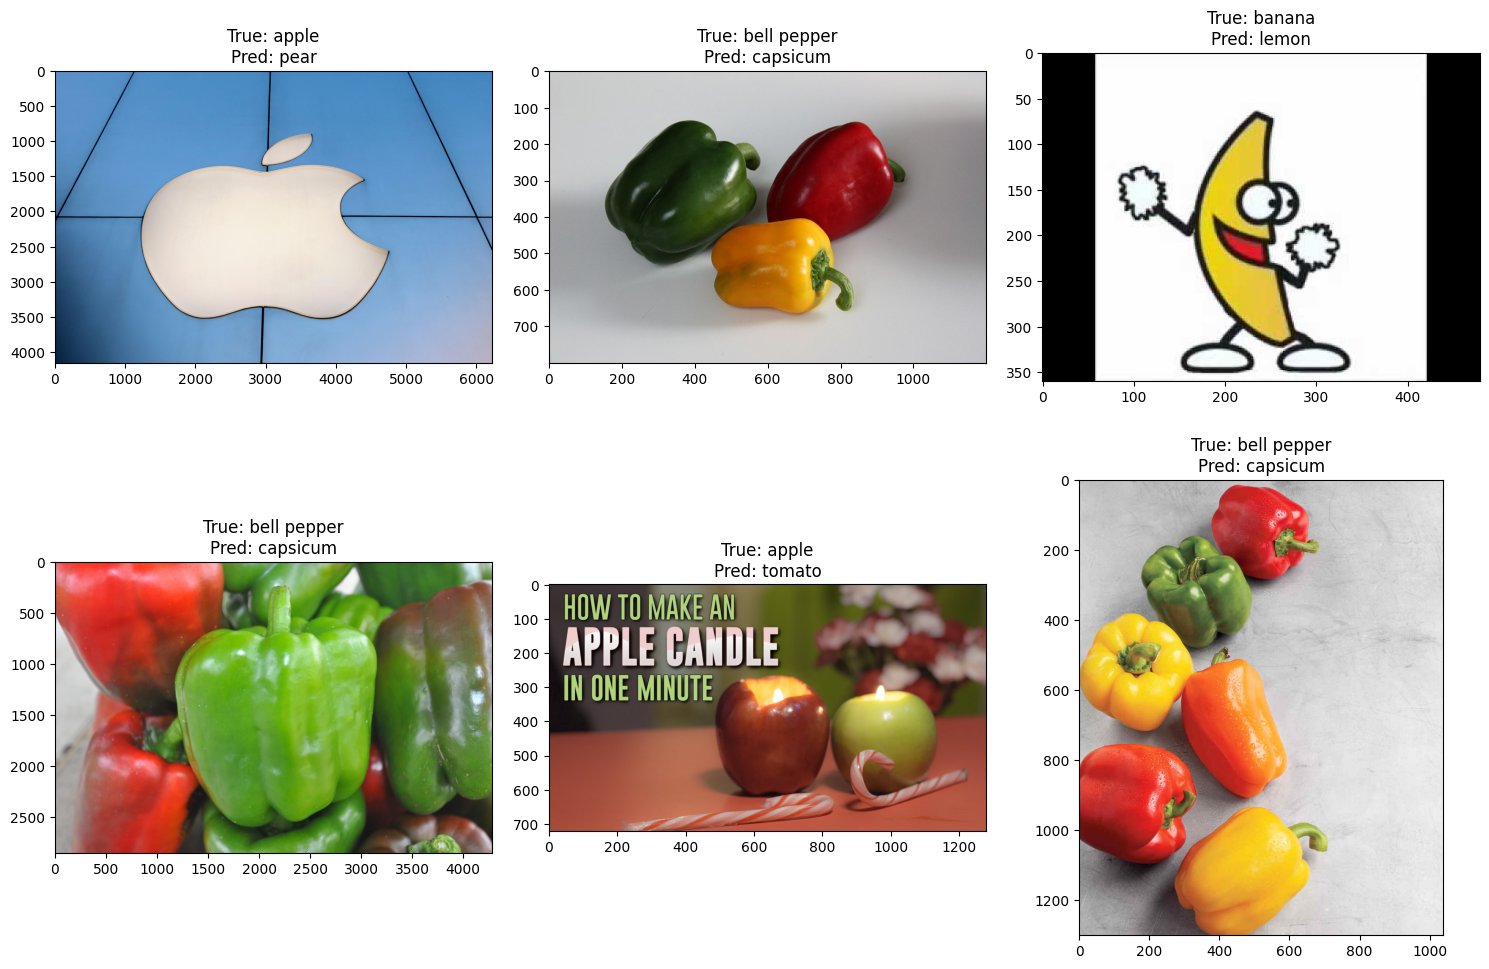

In [20]:
# Find misclassified images
misclassified_idx = [i for i, (true, pred) in enumerate(zip(y_test, pred)) if true != pred]
print(f"Number of misclassified images: {len(misclassified_idx)}")

# Display misclassified examples
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < len(misclassified_idx):
        idx = misclassified_idx[i]
        ax.imshow(plt.imread(test_df.Filepath.iloc[idx]))
        ax.set_title(f"True: {test_df.Label.iloc[idx]}\nPred: {pred[idx]}")
plt.tight_layout()
plt.show()

In [21]:
# Create a prediction function for new images
def predict_single_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction)

    labels = train_images.class_indices
    labels = dict((v,k) for k,v in labels.items())

    return labels[predicted_class], confidence

# Test the function
test_image = test_df.Filepath.iloc[0]
class_name, confidence = predict_single_image(test_image)
print(f"Predicted: {class_name} with {confidence:.2%} confidence")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: onion with 99.98% confidence


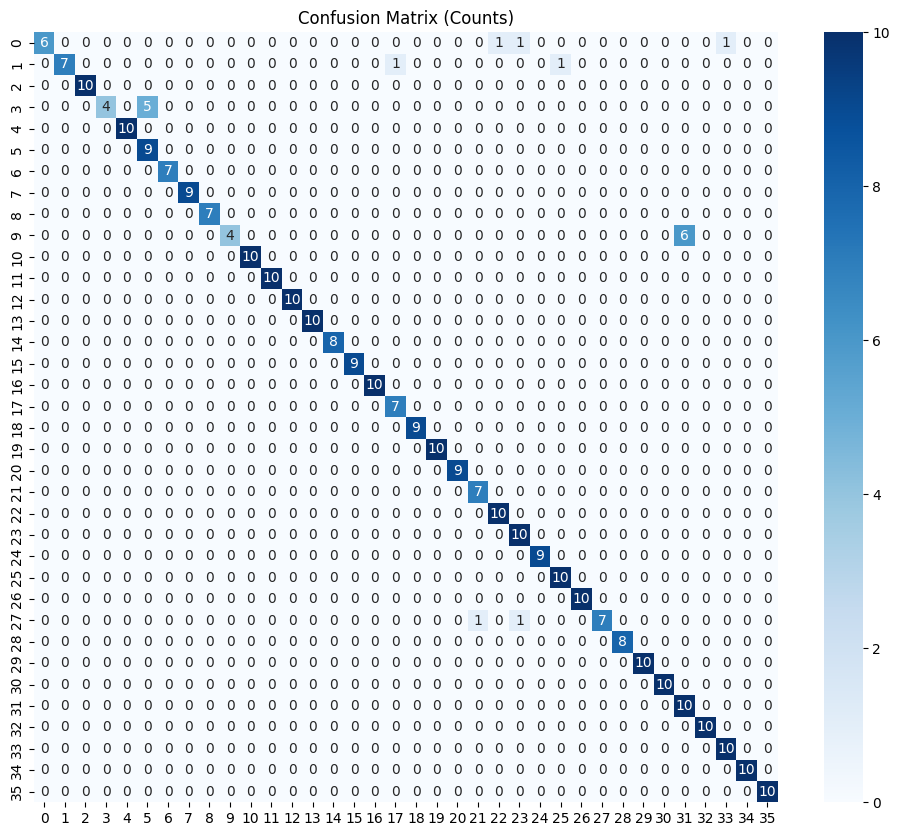

Most common misclassifications:
corn → sweetcorn: 6 times
bell pepper → capsicum: 5 times
apple → pear: 1 times
banana → lemon: 1 times
apple → tomato: 1 times


In [22]:
# Analyze which classes are most confused
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Counts)')
plt.show()

# Find the most common misclassifications
misclass_pairs = []
for i in range(len(y_test)):
    if y_test[i] != pred[i]:
        misclass_pairs.append((y_test[i], pred[i]))

from collections import Counter
common_errors = Counter(misclass_pairs).most_common(5)
print("Most common misclassifications:")
for (true, pred), count in common_errors:
    print(f"{true} → {pred}: {count} times")

In [26]:
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
import json
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create output directory
output_dir = Path('/content/fruit_vegetable_outputs')
output_dir.mkdir(exist_ok=True)

print("Saving essential outputs...")

# 1. Save the trained model
model.save(output_dir / 'fruit_vegetable_model.h5')
print("✓ Model saved")

# 2. Save training history plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.savefig(output_dir / 'training_history.png', bbox_inches='tight')
plt.close()
print("✓ Training plots saved")

# 3. Save class indices (important for predictions)
class_indices = train_images.class_indices
with open(output_dir / 'class_indices.json', 'w') as f:
    json.dump(class_indices, f)
print("✓ Class indices saved")

# 4. Save test predictions and accuracy
pred = model.predict(test_images)
pred_labels = np.argmax(pred, axis=1)

# Convert to class names
labels_dict = dict((v, k) for k, v in class_indices.items())
pred_class_names = [labels_dict[k] for k in pred_labels]
true_class_names = [labels_dict[k] for k in test_images.classes]

# Calculate accuracy
acc = accuracy_score(true_class_names, pred_class_names)

# Save accuracy
with open(output_dir / 'test_accuracy.txt', 'w') as f:
    f.write(f'Test Accuracy: {100*acc:.2f}%')

print(f"✓ Test accuracy saved: {100*acc:.2f}%")

# 5. Save confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(true_class_names, pred_class_names, normalize='true')
sns.heatmap(cm, annot=True, xticklabels=sorted(set(true_class_names)),
            yticklabels=sorted(set(true_class_names)))
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig(output_dir / 'confusion_matrix.png', bbox_inches='tight')
plt.close()
print("✓ Confusion matrix saved")

# 6. Save classification report
report = classification_report(true_class_names, pred_class_names)
with open(output_dir / 'classification_report.txt', 'w') as f:
    f.write(report)
print("✓ Classification report saved")

# 7. Create and save prediction function
prediction_code = '''
import tensorflow as tf
import numpy as np
import json

def load_model():
    model = tf.keras.models.load_model('fruit_vegetable_model.h5')
    with open('class_indices.json', 'r') as f:
        class_indices = json.load(f)
    return model, class_indices

def predict_image(image_path):
    model, class_indices = load_model()

    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction)

    labels = {v: k for k, v in class_indices.items()}
    class_name = labels[predicted_class]

    return class_name, confidence
'''

with open(output_dir / 'predict.py', 'w') as f:
    f.write(prediction_code)
print("✓ Prediction script saved")

# 8. Save sample predictions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    if i < 6:
        ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
        is_correct = true_class_names[i] == pred_class_names[i]
        color = 'green' if is_correct else 'red'
        ax.set_title(f"True: {true_class_names[i]}\nPred: {pred_class_names[i]}",
                    color=color, fontsize=10)
        ax.axis('off')
plt.tight_layout()
plt.savefig(output_dir / 'sample_predictions.png', bbox_inches='tight')
plt.close()
print("✓ Sample predictions saved")

print(f"\n🎯 Essential outputs saved to: {output_dir}")
print("\n📁 Files created:")
for file in output_dir.glob('*'):
    print(f"  - {file.name}")

Saving essential outputs...
✓ Model saved
✓ Training plots saved
✓ Class indices saved
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
✓ Test accuracy saved: 94.61%
✓ Confusion matrix saved
✓ Classification report saved
✓ Prediction script saved
✓ Sample predictions saved

🎯 Essential outputs saved to: /content/fruit_vegetable_outputs

📁 Files created:
  - fruit_vegetable_model.h5
  - sample_predictions.png
  - predict.py
  - training_history.png
  - class_indices.json
  - confusion_matrix.png
  - classification_report.txt
  - test_accuracy.txt
